In [26]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [27]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

df = pd.read_csv('../data/data_superset.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,State,City,agyaddr,xobsyr_0,Illicit_Days,Illicit_Cens,female,nonwhite,unemplmt_cd,prsatx_cd,gvsg_cd,CWSg_0_cd,dssg_0_cd,epsg_0_cd,adhdg_0_cd,cdsg_0_cd,cjsig_0_cd,lrig_0_cd,srig_0_cd,SESg_0_cd,r4ag_0_cd,SUDSy_0_cd,homeless_0_cd,ncar_cd,TRIg_0_cd,PYS9Sxg_cd,primsev_other,primsev_alcohol,primsev_amphetamines,primsev_cocaine,primsev_marijuana,primsev_opioids,B2a_0g,Address,lat,lng,state_name,county_FIPS,block_FIPS,murder_numg,%_dropoutg,%_povertyg,%_public_assistanceg,%_unemployedg,closest,gran,point,pop_deng
0,0,1,6,11520,TX,Laredo,"2386 E. Saunders, Suite 2",2007,78,1,0,1,0,0,2,0,1,1,0,0,2,1,2,1,2,3,0,1,1,0,0,0,0,0,1,0,1,"2386 E. Saunders, Suite 2 , L...",27.530608,-99.472335,Texas,48479.0,4.847900e+14,0,0.0,1.0,0.0,0.0,NaN,0.0,"('27.530608', '-99.472335')",0.0
1,1,2,7,19646,FL,Jacksonville,2671 Huffman Blvd,2011,365,0,0,1,0,0,0,0,2,1,1,0,0,1,2,0,0,1,0,1,1,0,0,1,0,0,0,0,1,"2671 Huffman Blvd , J...",30.298713,-81.504950,Florida,12031.0,1.203101e+14,0,0.0,0.0,0.0,0.0,NaN,0.0,"('30.298712599999998', '-81.50495040000001')",0.0
2,2,3,8,11738,TX,San Antonio,7703 Floyd Curl Drive,2008,188,0,0,1,0,0,0,0,0,0,0,0,1,2,2,0,0,2,0,1,0,0,0,0,0,0,1,0,1,"7703 Floyd Curl Drive , S...",29.513085,-98.577729,Texas,48029.0,4.802918e+14,0,0.0,0.0,0.0,0.0,NaN,0.0,"('29.5130847', '-98.57772890000001')",0.0
3,3,7,13,13054,AZ,Tucson,P.O. Box 3308,2007,365,0,0,1,1,1,2,0,0,1,1,1,2,2,2,0,1,3,0,0,0,0,0,0,1,0,0,0,1,"P.O. Box 3308 , T...",32.225221,-110.909508,Arizona,4019.0,4.019002e+13,0,0.0,0.0,0.0,0.0,NaN,1.0,"('32.225221000000005', '-110.909508')",0.0
4,4,10,16,15206,MA,Cambridge,349 Broadway,2008,337,0,1,1,0,0,2,0,2,0,0,0,0,1,2,0,0,1,1,1,1,0,0,0,1,0,0,0,2,"349 Broadway , C...",42.370383,-71.103350,Massachusetts,25017.0,2.501735e+14,0,0.0,0.0,0.0,0.0,NaN,0.0,"('42.3703833', '-71.1033498')",0.0


In [28]:
# drop unnecessary columns
cols_to_drop = ['Address','lat','lng','xobsyr_0','Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1',
                'ID','State','City','agyaddr','state_name','gran','county_FIPS','block_FIPS',
                'point','closest']

df.drop(columns=cols_to_drop, inplace=True)
df.dropna(inplace=True) # drops any remaining rows with null values

# uncomment to get CONTROL statistics
#cols_to_drop = ['pop_deng','%_dropoutg','%_unemployedg','%_public_assistanceg','%_povertyg','murder_numg']
#df.drop(columns=cols_to_drop, inplace=True)

df = df.astype(int)
df = df.sample(frac=1).reset_index(drop=True) # shuffle rows
df.shape

(10683, 35)

In [29]:
predictor_var = 'Illicit_Days'
censoring_var = 'Illicit_Cens'

X = df[df.SUDSy_0_cd == 1]
X.drop(columns=[censoring_var, predictor_var, 'SUDSy_0_cd'], inplace=True)

print(X.shape)

(3365, 32)


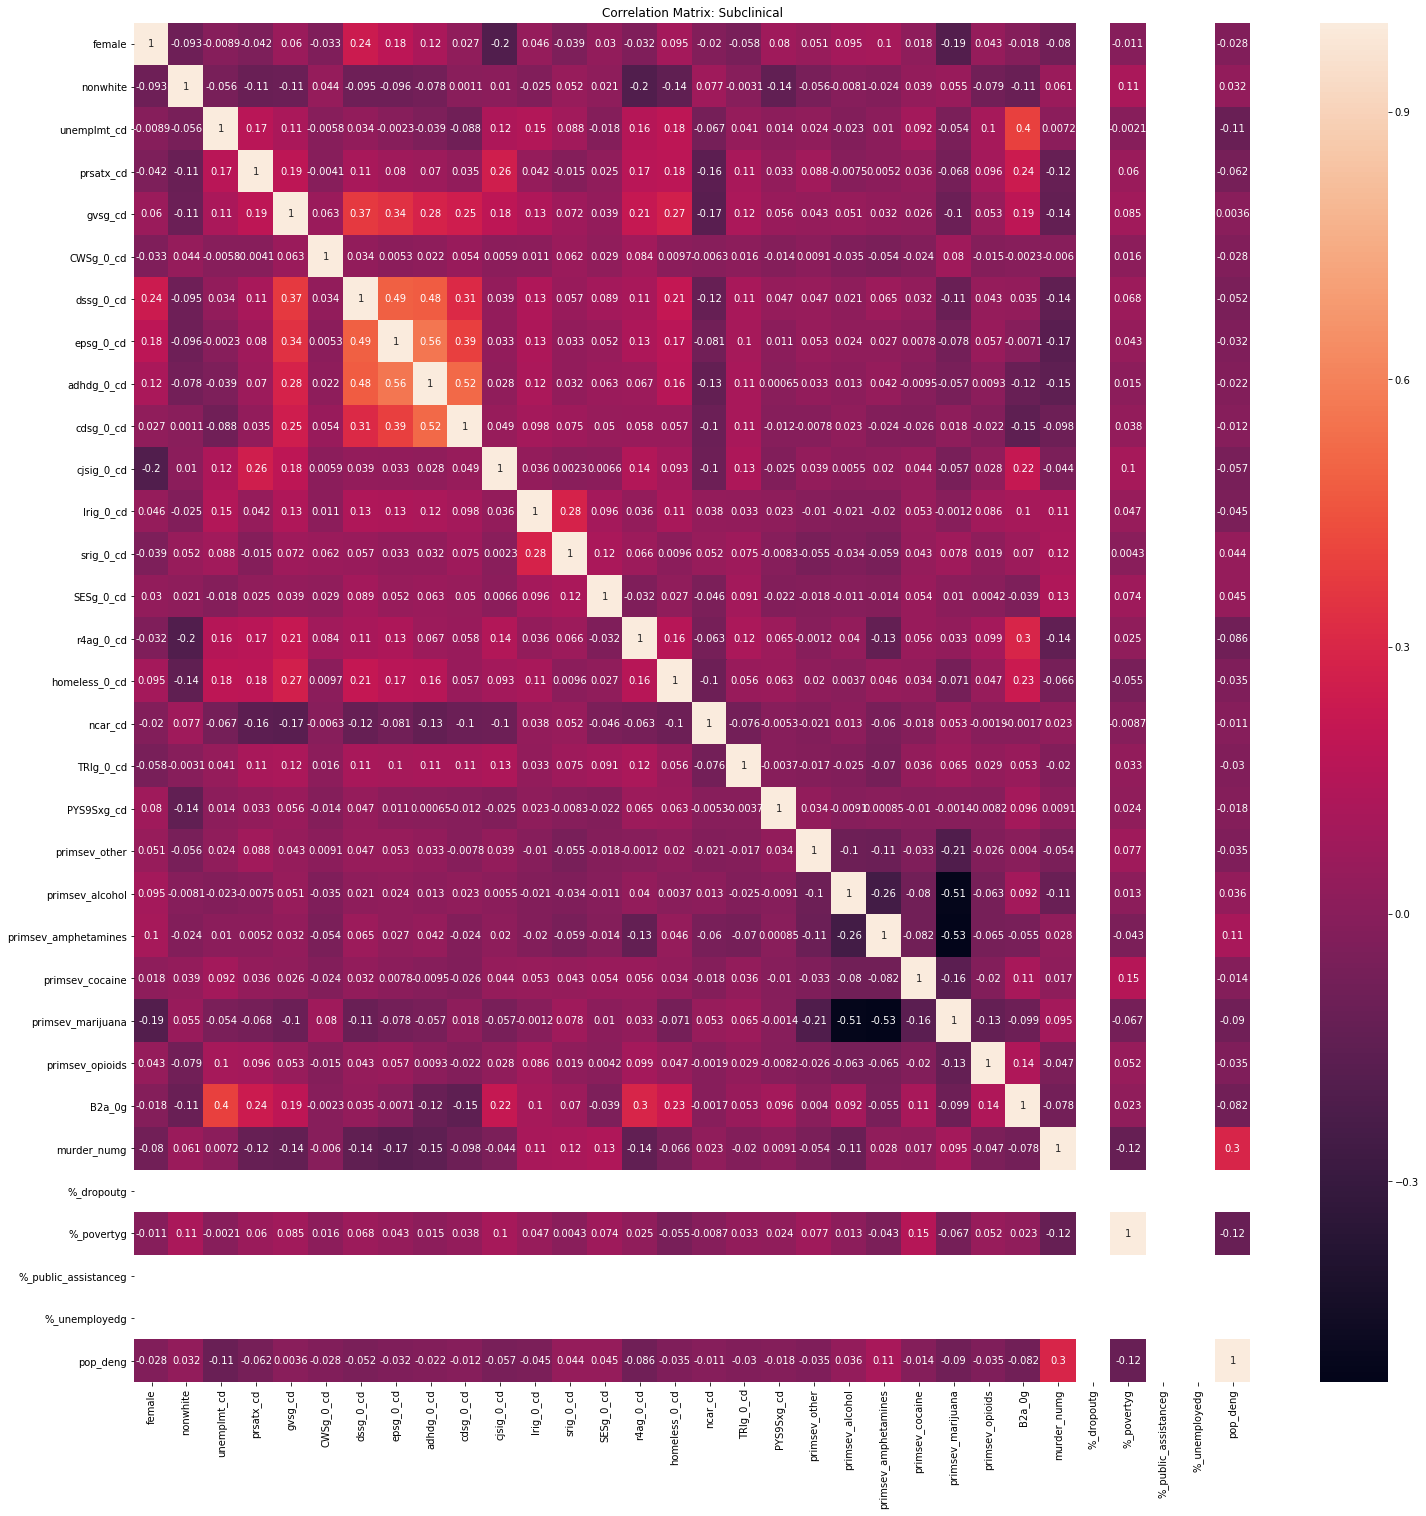

In [30]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 25, 25

corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix: Subclinical')
plt.savefig('../graphs/corr_sub.png')
plt.show()

In [31]:
X = df[df.SUDSy_0_cd == 2]
X.drop(columns=[censoring_var, predictor_var, 'SUDSy_0_cd'], inplace=True)

print(X.shape)

(2964, 32)


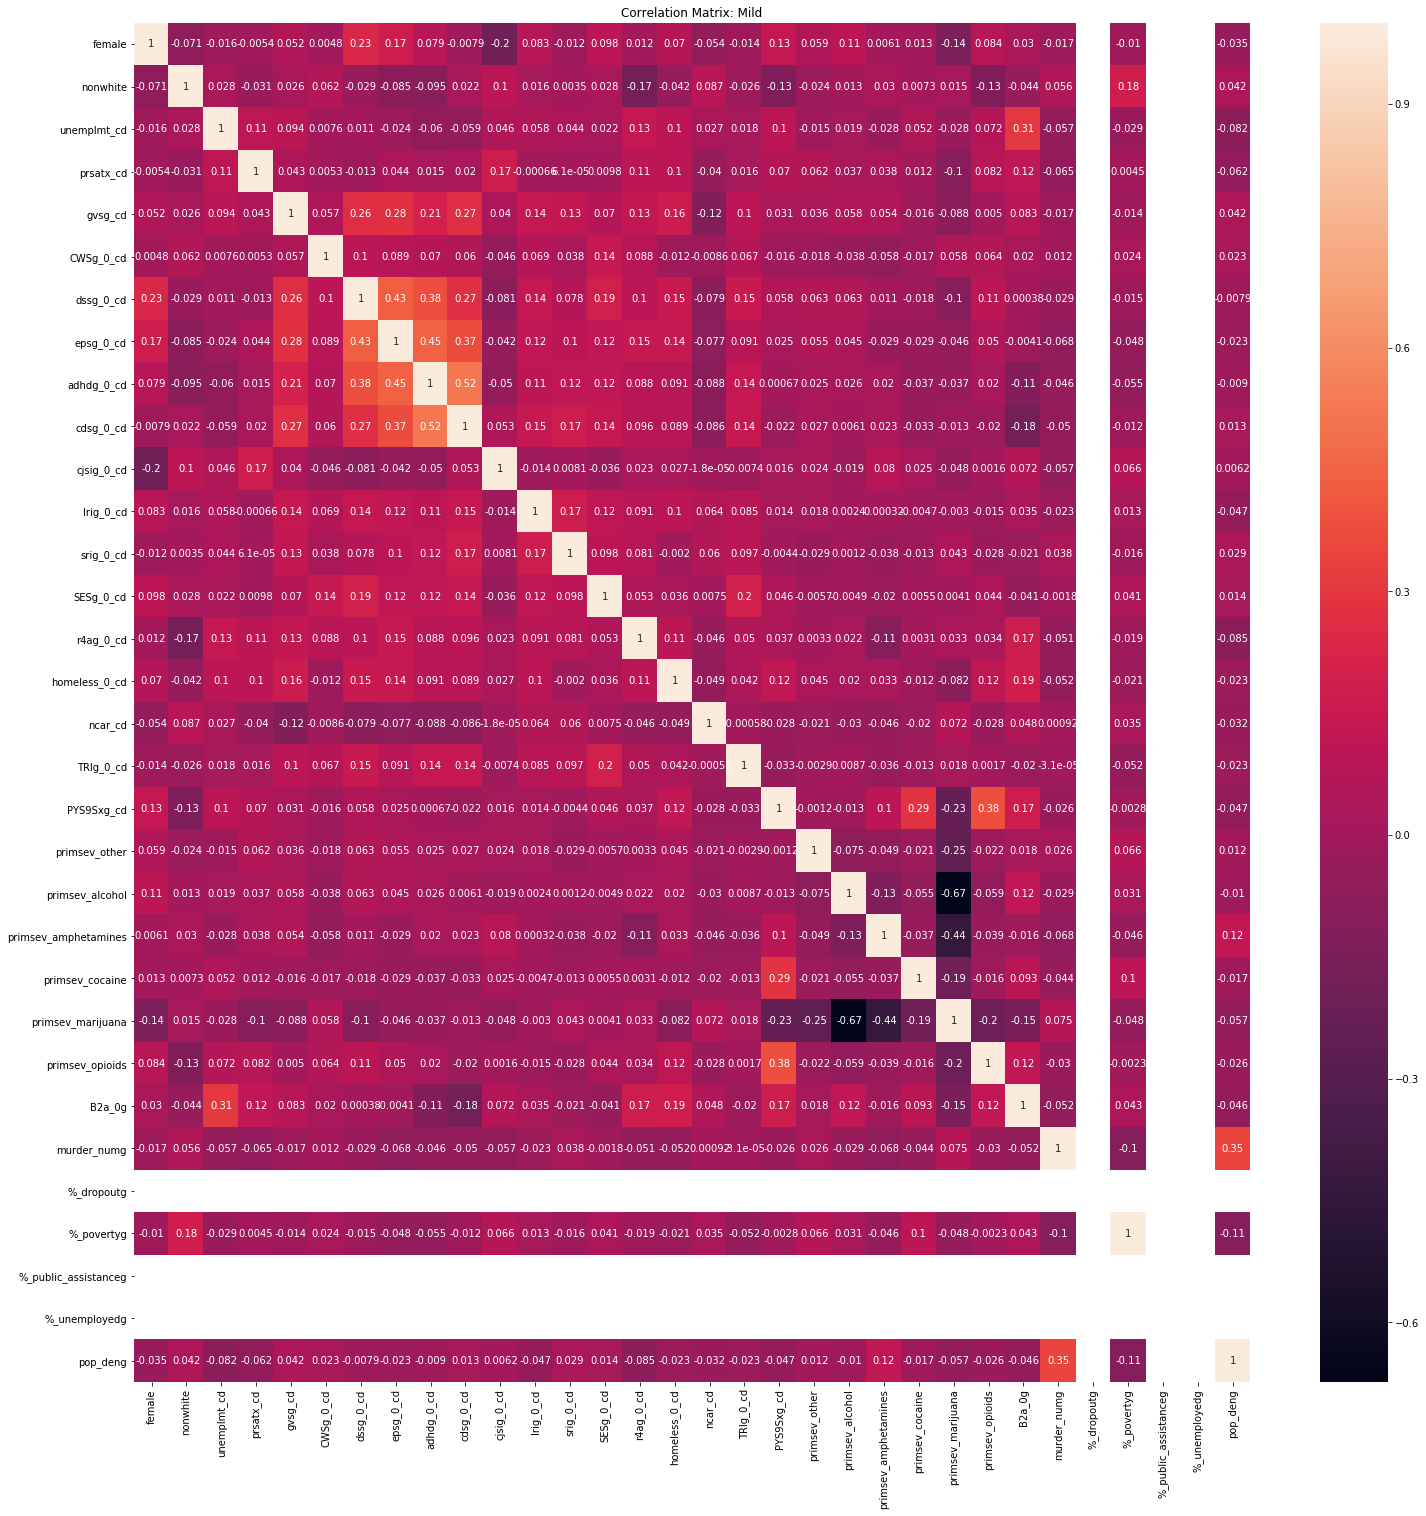

In [32]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix: Mild')
plt.savefig('../graphs/corr_mild.png')
plt.show()

In [33]:
X = df[df.SUDSy_0_cd == 3]
X.drop(columns=[censoring_var, predictor_var, 'SUDSy_0_cd'], inplace=True)

print(X.shape)

(4354, 32)


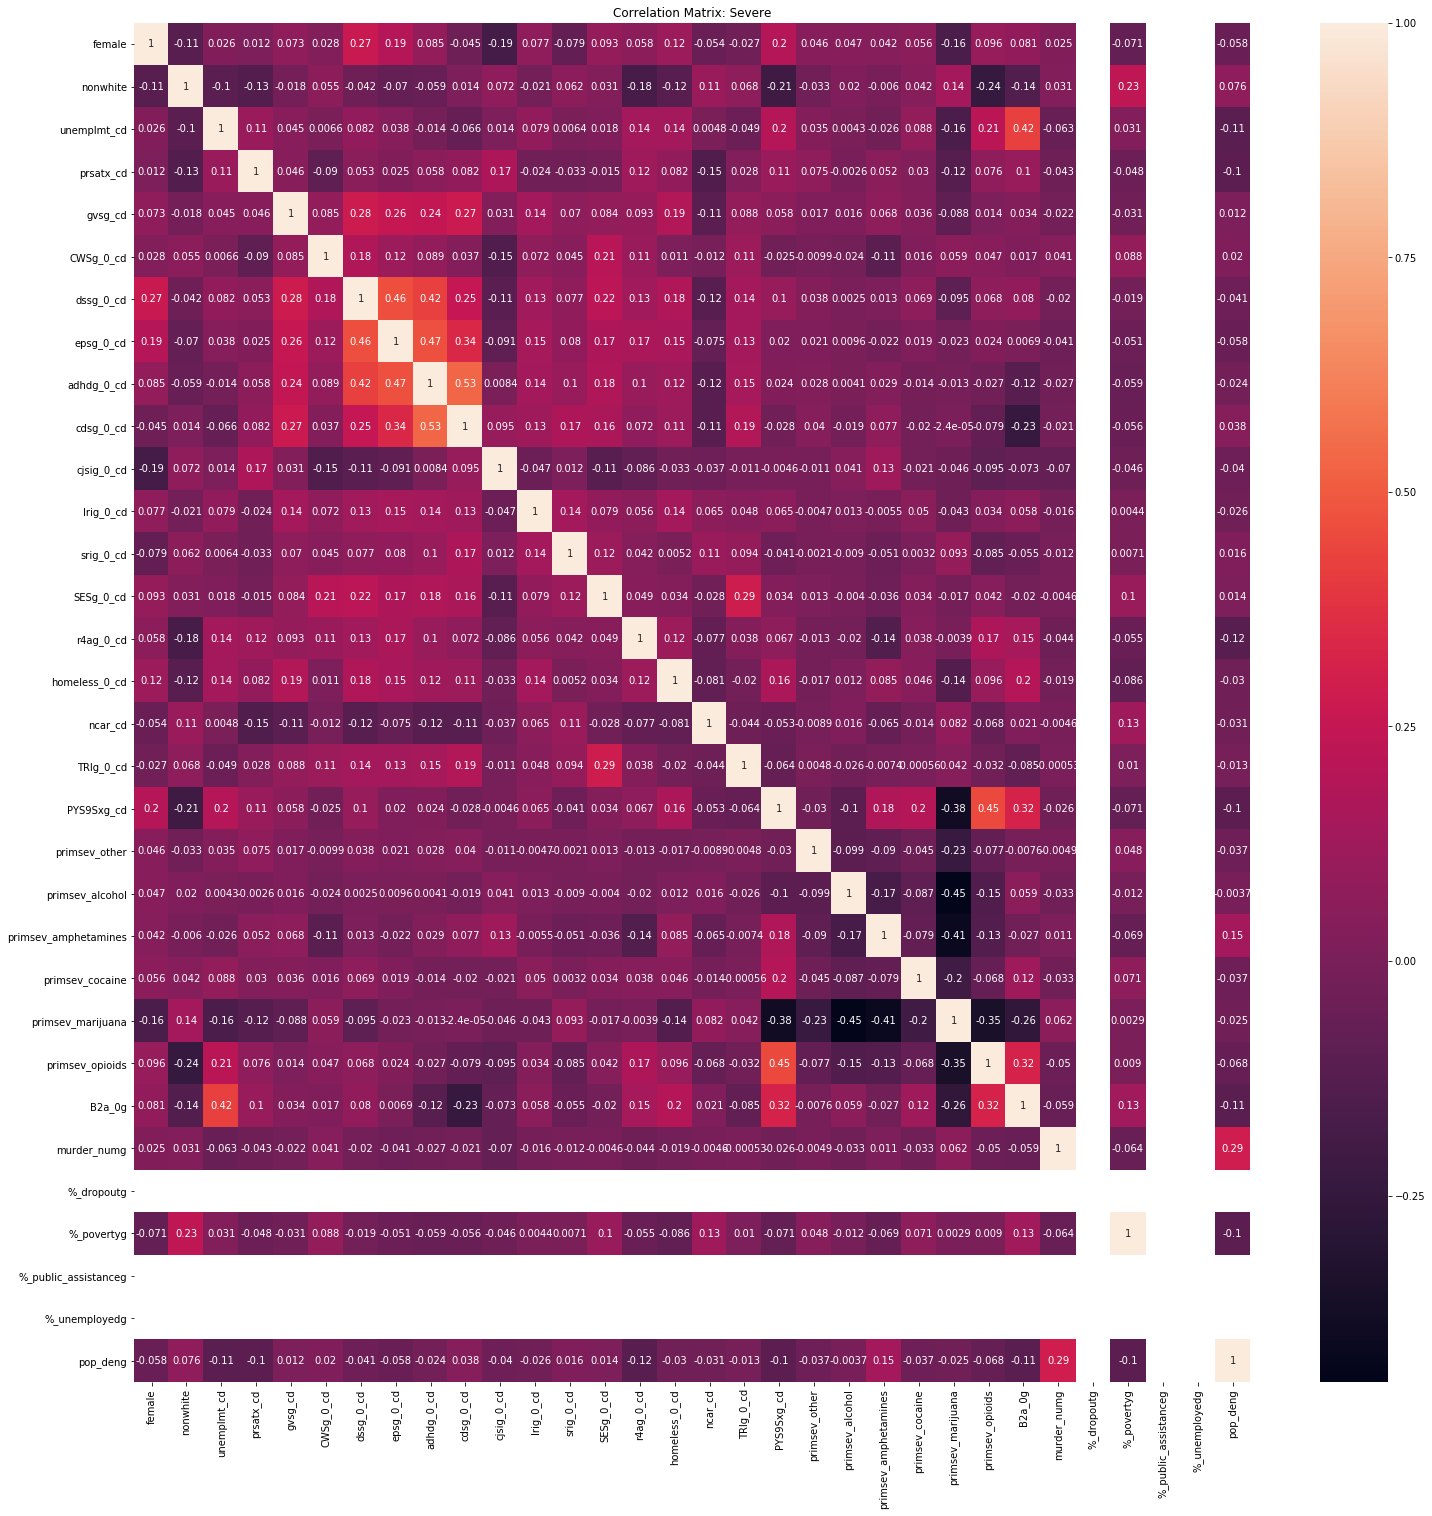

In [34]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix: Severe')
plt.savefig('../graphs/corr_severe.png')
plt.show()

In [35]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
minutes = total_seconds // 60
seconds = total_seconds % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")

--- 0 minutes 44 seconds ---
